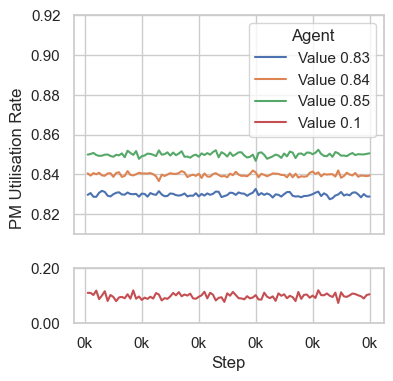

In [66]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(font_scale=1.2)
sns.set_theme(style="whitegrid", palette='deep')
values = np.random.normal(0.83, 0.001, size=100).tolist() + np.random.normal(0.84, 0.001, size=100).tolist() + np.random.normal(0.85, 0.001, size=100).tolist() + np.random.normal(0.1, 0.01, size=100).tolist() 

# Create a list of names corresponding to the values
names = ['Value 0.83'] * 100 + ['Value 0.84'] * 100 + ['Value 0.85'] * 100 + ['Value 0.1'] * 100

steps = np.concatenate((np.arange(1, 101), np.arange(1, 101), np.arange(1, 101), np.arange(1, 101)))
# Create a DataFrame with the values and names
df = pd.DataFrame({'Step': steps, 'PM Utilisation Rate': values, 'Agent': names})

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(4, 4), gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.25})

g1 = sns.lineplot(x="Step", y="PM Utilisation Rate", hue='Agent', data=df, ax=ax1)
g2 = sns.lineplot(x="Step", y="PM Utilisation Rate", hue='Agent', data=df, ax=ax2)

ax1.set_ylim(0.81, 0.92)
ax2.set_ylim(0.00, 0.20)

# Hide the spines between the subplots

ax1.set_xlabel("")
ax2.set_ylabel("")

# Set the y-axis label and get the label object
ylabel = ax1.set_ylabel("PM Utilisation Rate")

# Get the current position of the y-axis label
xpos, ypos = ylabel.get_position()

# Move the y-axis label down
ylabel.set_position((xpos, ypos - 0.15))

# Move the legend to the upper plot
ax1.legend(title='Agent')
ax2.get_legend().remove()

def format_to_two_decimal(x, pos):
    return f'{x:.2f}'

def step_formatter(x, pos):
    return f'{int(x/1000)}k'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(step_formatter))

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_to_two_decimal))
